<a href="https://colab.research.google.com/github/Afranur-Artar/Deep-Learning-NLP-Project/blob/main/IMDB_NLP_Project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from wordcloud import WordCloud
import string
import re
from nltk.corpus import wordnet
from bs4 import BeautifulSoup
import nltk
nltk.download('wordnet')
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving IMDB Dataset.csv to IMDB Dataset.csv


In [ ]:
pd.set_option('display.max_colwidth', 70)
df=pd.read_csv("IMDB Dataset.csv", engine ='python')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that after watching just ...,positive
1,A wonderful little production. <br /><br />The filming technique i...,positive
2,I thought this was a wonderful way to spend time on a too hot summ...,positive
3,Basically there's a family where a little boy (Jake) thinks there'...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is a visually stunning...",positive


In [ ]:
df.shape

(50000, 2)

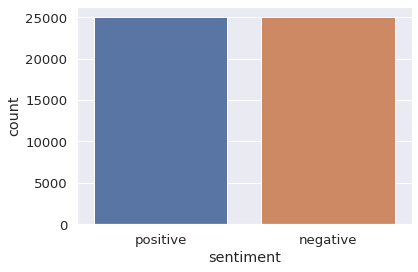

In [ ]:
sns.set(style = "darkgrid" , font_scale = 1.2)
sns.countplot(df.sentiment);

In [ ]:
print("Positive sentiment length is {}". format(len(df[df.sentiment=="positive"])/len(df)))
print("Positive sentiment length is {}". format(len(df[df.sentiment=="negative"])/len(df)))

Positive sentiment length is 0.5
Positive sentiment length is 0.5


In [ ]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [ ]:
pd.set_option('display.max_colwidth', 150)
df.review.head()

0    One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened ...
1    A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometim...
2    I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted ...
3    Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />Thi...
4    Petter Mattei's "Love in the Time of Money" is a visually stunning film to watch. Mr. Mattei offers us a vivid portrait about human relations. Thi...
Name: review, dtype: object

In [ ]:
df["sentiment"]=pd.get_dummies(df["sentiment"], drop_first=True)
df.head(2)

,review,sentiment
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened ...",1
1,"A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometim...",1


In [ ]:
# Before tokenization, first apply re.sub() function to replace Synonym, antonym, meaning words

# Replace movie's synonyms
synonyms=[]
antonyms=[]

for syn in wordnet.synsets("movie"):
    for lemma in syn.lemmas():
        synonyms.append(lemma.name())
        if lemma.antonyms():
            antonyms.append(lemma.antonyms()[0].name())
            
print("Synonyms of movie:", synonyms)
print("Antonyms of movie:", antonyms)

Synonyms of movie: ['movie', 'film', 'picture', 'moving_picture', 'moving-picture_show', 'motion_picture', 'motion-picture_show', 'picture_show', 'pic', 'flick']
Antonyms of movie: []


In [ ]:
def replace(words):
    words=re.sub(r" film ", "movie", words)
    words=re.sub(r" films ", "movie", words)
    words=re.sub(r" dvd ", "movie", words)
    words=re.sub(r" straightforward ", "straight forward", words)
    words=re.sub(r" It's ", "It is", words)
    words=re.sub(r" sci-fi ", "science fiction", words)
    words=re.sub(r" film's ", "movie", words)
    words=re.sub(r" filming ", "movie", words)
    words=re.sub(r" I've ", "I have", words)
    words=re.sub(r" movies ", "movie", words)
    words=re.sub(r"picture", "movie", words)
    words=re.sub(r"pic", "movie", words)
    words=re.sub(r"moving_picture", "movie", words)
    words=re.sub(r"moving-picture_show", "movie", words)
    words=re.sub(r"motion_picture", "movie", words)
    words=re.sub(r"motion_picture_show", "movie", words)
    words=re.sub(r"picture_show", "movie", words)
    words=re.sub(r"watching", "watch", words)
    words=re.sub(r"watched", "watch", words)
    words=re.sub(r"saw", "see", words)
    words=re.sub(r"I'd love", "I would love", words)
    words=re.sub(r"seen", "see", words)
    words=re.sub(r"gone", "go", words)
    words=re.sub(r"went", "go", words)
    words=re.sub(r"wouldnt", "would not", words)
    words=re.sub(r"thismovieon", "this movie on", words)
    words=re.sub(r"stunningmovieto ", "stunning movie to", words)
    words=re.sub(r"Themovietechnique", "The movie technique", words)
    words=re.sub(r"couldnt", "could not", words)
    words=re.sub(r"<br /><br />", " ", words)
    words=re.sub(r"you're", "you",words)
    words=re.sub(r"they're", "you",words)
    words=re.sub(r"They're", "you",words)
    words=re.sub(r"went", "go",words)
    words=re.sub(r"gone", "go",words)
    words=re.sub(r"old-time-BBC", "old time BBC",words)
    words=re.sub(r"youll", "you will",words)
    words=re.sub(r"Somemoviejust", "some movie just",words) 
    words=re.sub(r"firstmoviei", "first movie",words)
    words=re.sub(r"wasn't", "was not",words)
    words=re.sub(r"there's", "there is",words)
    words=re.sub(r"quirkymoviewhere", "quirky movie where",words) 
    words=re.sub(r"all-time", "all time",words)
    words=re.sub(r"im", "i am",words)
    words=re.sub(r"unassuming-", "unassuming",words) 
    words=re.sub(r"light-hearted", "light hearted",words)
    words=re.sub(r"stunningmovieof", "stunning movie of",words) 
    words=re.sub(r"don't", "do not",words)
    words=re.sub(r"doesn't", "does not",words)
    words=re.sub(r"Trekmovieto", "Trek movie to",words) 
    words=re.sub(r"tymovieal", "ty movie al",words)  
    words=re.sub(r"bestmovieof", "best movie of",words) 
    words=re.sub(r"haven't", "have not",words) 
    words=re.sub(r"hasn't", "has not",words)
    words=re.sub(r"ti ame", "time",words)
    words=re.sub(r"well-known", "well known",words)
    words=re.sub(r"full-ti ame", "full time",words)
    words=re.sub(r"didn't", "did not",words)
    words=re.sub(r"it's", "it is",words)
    words=re.sub(r"Thismovietried", "This movie tried",words) 
    words=re.sub(r"thismovienot", "this movie not",words) 
    words=re.sub(r"thismovieat", "this movie at",words) 
    words=re.sub(r"finestmovieever", "finest movie ever",words) 
    words=re.sub(r"entiremovieis", "entire movie is",words) 
    words=re.sub(r"experi ament", "experiment",words)
    words=re.sub(r"b-movie", "movie",words)
    words=re.sub(r"ofmovieof", "of movie of",words) 
    words=re.sub(r"thismoviecould", "this movie could",words) 
    words=re.sub(r"isn't", "is not",words)
    words=re.sub(r"cannot", "can not",words)
    words=re.sub(r"clichés", " ",words)
    words=re.sub(r"aboutmoviebefore", "about movie before",words) 
    words=re.sub(r"shortmoviesucks", "short movie sucks",words) 
    words=re.sub(r"Thismovietook", "This movie took",words) 
    words=re.sub(r"Thismovielaboured", "This movie laboured",words) 
    words=re.sub(r"I've", "I have",words) 
    words=re.sub(r"i've", "i have",words)
    words=re.sub(r"si ample", "simple",words)
    words=re.sub(r"well", "good",words)
    words=re.sub(r"you'll", "you will",words)
    words=re.sub(r"aren't", "are not",words)
    words=re.sub(r"Ti ame", "time",words)
    words=re.sub(r"towatch", "to watch",words)
    words=re.sub(r"Oz", " ",words)
    words=re.sub(r"oz", " ",words)
    words=re.sub(r"Mr.", " ",words)
    words=re.sub(r"They're", "They are",words)
    words=re.sub(r"they're", "they are",words)
    words=re.sub(r"I don't", "I do not",words)
    words=re.sub(r"movieand", "movie and",words)
    words=re.sub(r"mistakei", "mistake",words)
    words=re.sub(r"loo", "look",words)
    words = re.sub(r"won't", "will not", words)
    words = re.sub(r"can\'t", "can not", words)

    # general
    words = re.sub(r"n\'t", " not", words)
    words = re.sub(r"\'re", " are", words)
    words = re.sub(r"\'s", " is", words)
    words = re.sub(r"\'d", " would", words)
    words = re.sub(r"\'ll", " will", words)
    words = re.sub(r"\'t", " not", words)
    words = re.sub(r"\'ve", " have", words)
    words = re.sub(r"\'m", " am", words)
    
    return str(words)

df["review"]=df["review"].apply(replace)

df["review"].head()

0    One of the other reviewers has mentioned that after watch just 1   episode you will be hooked. They are right, as this is exactly what happened wi...
1    A wonderful little production.  The movie technique is very unassuming very old time BBC fashion and gives a comforting, and sometimes discomforti...
2    I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watch a light hearted com...
3    Basically there is a family where a little boy (Jake) thinks there is a zombie in his closet & his parents are fighting all the time. This movie i...
4    Petter Mattei is "Love in the time of Money" is a visually stunning movie to watch.   Mattei offers us a vivid portrait about human relations. Thi...
Name: review, dtype: object

## Remove Punctuation

In [ ]:
# Remove punctuation:

def remove_punct(text):
    text_nopunct="".join([char for char in text if char not in string.punctuation])
    return text_nopunct

%time df["review"]=df["review"].apply(lambda x: remove_punct(x.lower()))

df.review.head(10)

CPU times: user 5.72 s, sys: 17.6 ms, total: 5.74 s
Wall time: 5.75 s


0    one of the other reviewers has mentioned that after watch just 1   episode you will be hooked they are right as this is exactly what happened with...
1    a wonderful little production  the movie technique is very unassuming very old time bbc fashion and gives a comforting and sometimes discomforting...
2    i thought this was a wonderful way to spend time on a too hot summer weekend sitting in the air conditioned theater and watch a light hearted come...
3    basically there is a family where a little boy jake thinks there is a zombie in his closet  his parents are fighting all the time this movie is sl...
4    petter mattei is love in the time of money is a visually stunning movie to watch   mattei offers us a vivid portrait about human relations this is...
5    probably my all time favorite movie a story of selflessness sacrifice and dedication to a noble cause but it is not preachy or boring it just neve...
6    i sure would like to see a resurrection of a up dated seahunt ser

### Remove url, special characters

In [ ]:
# Remove url and other characters

def remove_url(txt):
    text=" ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())
    return text

df["review"]=df["review"].apply(lambda x: remove_url(x))
df.review.head()

0    one of the other reviewers has mentioned that after watch just 1 episode you will be hooked they are right as this is exactly what happened with m...
1    a wonderful little production the movie technique is very unassuming very old time bbc fashion and gives a comforting and sometimes discomforting ...
2    i thought this was a wonderful way to spend time on a too hot summer weekend sitting in the air conditioned theater and watch a light hearted come...
3    basically there is a family where a little boy jake thinks there is a zombie in his closet his parents are fighting all the time this movie is slo...
4    petter mattei is love in the time of money is a visually stunning movie to watch mattei offers us a vivid portrait about human relations this is a...
Name: review, dtype: object

In [ ]:
# Remove numbers

df['review'] = df['review'].str.replace('\d','')

In [ ]:
#Removing html strips

def remove_html(text):
    return BeautifulSoup(text, "lxml").text

df['review'] = df['review'].apply(lambda text: remove_html(text))

## Tokenization

In [ ]:
import re

def tokenize(text):
    tokens=re.split('\W+', text)
    return tokens

%time df["review_tokenized"]=df["review"].apply(lambda x: tokenize(x))

df.head()

CPU times: user 3.46 s, sys: 476 ms, total: 3.93 s
Wall time: 3.94 s


,review,sentiment,review_tokenized
0,one of the other reviewers has mentioned that after watch just episode you will be hooked they are right as this is exactly what happened with me...,1,"[one, of, the, other, reviewers, has, mentioned, that, after, watch, just, episode, you, will, be, hooked, they, are, right, as, this, is, exactly..."
1,a wonderful little production the movie technique is very unassuming very old time bbc fashion and gives a comforting and sometimes discomforting ...,1,"[a, wonderful, little, production, the, movie, technique, is, very, unassuming, very, old, time, bbc, fashion, and, gives, a, comforting, and, som..."
2,i thought this was a wonderful way to spend time on a too hot summer weekend sitting in the air conditioned theater and watch a light hearted come...,1,"[i, thought, this, was, a, wonderful, way, to, spend, time, on, a, too, hot, summer, weekend, sitting, in, the, air, conditioned, theater, and, wa..."
3,basically there is a family where a little boy jake thinks there is a zombie in his closet his parents are fighting all the time this movie is slo...,0,"[basically, there, is, a, family, where, a, little, boy, jake, thinks, there, is, a, zombie, in, his, closet, his, parents, are, fighting, all, th..."
4,petter mattei is love in the time of money is a visually stunning movie to watch mattei offers us a vivid portrait about human relations this is a...,1,"[petter, mattei, is, love, in, the, time, of, money, is, a, visually, stunning, movie, to, watch, mattei, offers, us, a, vivid, portrait, about, h..."


### Remove Stopwords

In [ ]:
stopword = nltk.corpus.stopwords.words('english')

def remove_stopword(tokenized_list):
    text= [word for word in tokenized_list if word not in stopword]
    return text

%time df["review_nostop"]=df["review_tokenized"].apply(lambda x: remove_stopword(x))

df.head(3)

CPU times: user 18.1 s, sys: 11 ms, total: 18.1 s
Wall time: 18.1 s


,review,sentiment,review_tokenized,review_nostop
0,one of the other reviewers has mentioned that after watch just episode you will be hooked they are right as this is exactly what happened with me...,1,"[one, of, the, other, reviewers, has, mentioned, that, after, watch, just, episode, you, will, be, hooked, they, are, right, as, this, is, exactly...","[one, reviewers, mentioned, watch, episode, hooked, right, exactly, happened, first, thing, struck, brutality, unflinching, scenes, violence, set,..."
1,a wonderful little production the movie technique is very unassuming very old time bbc fashion and gives a comforting and sometimes discomforting ...,1,"[a, wonderful, little, production, the, movie, technique, is, very, unassuming, very, old, time, bbc, fashion, and, gives, a, comforting, and, som...","[wonderful, little, production, movie, technique, unassuming, old, time, bbc, fashion, gives, comforting, sometimes, discomforting, sense, realism..."
2,i thought this was a wonderful way to spend time on a too hot summer weekend sitting in the air conditioned theater and watch a light hearted come...,1,"[i, thought, this, was, a, wonderful, way, to, spend, time, on, a, too, hot, summer, weekend, sitting, in, the, air, conditioned, theater, and, wa...","[thought, wonderful, way, spend, time, hot, summer, weekend, sitting, air, conditioned, theater, watch, light, hearted, comedy, plot, si, amplisti..."


### Stem Text

In [ ]:
import nltk

ps = nltk.PorterStemmer()

In [ ]:
def stemming(tokenized_text):
    text= [ps.stem(word) for word in tokenized_text]
    return text

%time df["review_stemmed"]=df["review_nostop"].apply(lambda x: stemming(x)) 
df.head(3)

CPU times: user 1min 47s, sys: 352 ms, total: 1min 48s
Wall time: 1min 48s


,review,sentiment,review_tokenized,review_nostop,review_stemmed
0,one of the other reviewers has mentioned that after watch just episode you will be hooked they are right as this is exactly what happened with me...,1,"[one, of, the, other, reviewers, has, mentioned, that, after, watch, just, episode, you, will, be, hooked, they, are, right, as, this, is, exactly...","[one, reviewers, mentioned, watch, episode, hooked, right, exactly, happened, first, thing, struck, brutality, unflinching, scenes, violence, set,...","[one, review, mention, watch, episod, hook, right, exactli, happen, first, thing, struck, brutal, unflinch, scene, violenc, set, right, word, go, ..."
1,a wonderful little production the movie technique is very unassuming very old time bbc fashion and gives a comforting and sometimes discomforting ...,1,"[a, wonderful, little, production, the, movie, technique, is, very, unassuming, very, old, time, bbc, fashion, and, gives, a, comforting, and, som...","[wonderful, little, production, movie, technique, unassuming, old, time, bbc, fashion, gives, comforting, sometimes, discomforting, sense, realism...","[wonder, littl, product, movi, techniqu, unassum, old, time, bbc, fashion, give, comfort, sometim, discomfort, sens, realism, entir, piec, actor, ..."
2,i thought this was a wonderful way to spend time on a too hot summer weekend sitting in the air conditioned theater and watch a light hearted come...,1,"[i, thought, this, was, a, wonderful, way, to, spend, time, on, a, too, hot, summer, weekend, sitting, in, the, air, conditioned, theater, and, wa...","[thought, wonderful, way, spend, time, hot, summer, weekend, sitting, air, conditioned, theater, watch, light, hearted, comedy, plot, si, amplisti...","[thought, wonder, way, spend, time, hot, summer, weekend, sit, air, condit, theater, watch, light, heart, comedi, plot, si, amplist, dialogu, witt..."


### Lemmatizing

In [ ]:
wn = nltk.WordNetLemmatizer()
ps = nltk.PorterStemmer()
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
def lemmatizing(tokenized_test):
    text=[wn.lemmatize(word) for word in tokenized_test]
    return text

%time df["review_lemmatized"]=df["review_nostop"].apply(lambda x: lemmatizing(x))

df.head(3)

CPU times: user 22.6 s, sys: 63.8 ms, total: 22.7 s
Wall time: 22.7 s


,review,sentiment,review_tokenized,review_nostop,review_lemmatized
0,one of the other reviewers has mentioned that after watch just episode you will be hooked they are right as this is exactly what happened with me...,1,"[one, of, the, other, reviewers, has, mentioned, that, after, watch, just, episode, you, will, be, hooked, they, are, right, as, this, is, exactly...","[one, reviewers, mentioned, watch, episode, hooked, right, exactly, happened, first, thing, struck, brutality, unflinching, scenes, violence, set,...","[one, reviewer, mentioned, watch, episode, hooked, right, exactly, happened, first, thing, struck, brutality, unflinching, scene, violence, set, r..."
1,a wonderful little production the movie technique is very unassuming very old time bbc fashion and gives a comforting and sometimes discomforting ...,1,"[a, wonderful, little, production, the, movie, technique, is, very, unassuming, very, old, time, bbc, fashion, and, gives, a, comforting, and, som...","[wonderful, little, production, movie, technique, unassuming, old, time, bbc, fashion, gives, comforting, sometimes, discomforting, sense, realism...","[wonderful, little, production, movie, technique, unassuming, old, time, bbc, fashion, give, comforting, sometimes, discomforting, sense, realism,..."
2,i thought this was a wonderful way to spend time on a too hot summer weekend sitting in the air conditioned theater and watch a light hearted come...,1,"[i, thought, this, was, a, wonderful, way, to, spend, time, on, a, too, hot, summer, weekend, sitting, in, the, air, conditioned, theater, and, wa...","[thought, wonderful, way, spend, time, hot, summer, weekend, sitting, air, conditioned, theater, watch, light, hearted, comedy, plot, si, amplisti...","[thought, wonderful, way, spend, time, hot, summer, weekend, sitting, air, conditioned, theater, watch, light, hearted, comedy, plot, si, amplisti..."


#### I prefer to use lemmatizing method because of better

In [ ]:
df.drop(["review_stemmed"], axis=1, inplace=True)

In [ ]:
!pip install wordsegment

import wordsegment

     |████████████████████████████████| 4.8MB 5.8MB/s 


In [ ]:
segmenter=wordsegment.Segmenter()
load = segmenter.load()

data_frame=pd.DataFrame()

for word in range(len(df["review_lemmatized"])):
  text=', '.join(map(str, df.review_lemmatized[word]))
  clean = segmenter.clean(text) 
  isegment = segmenter.isegment(clean) 
  word_segment= list(isegment)    
  data_frame = data_frame.append({'word_segment': word_segment}, ignore_index=True)
    
data_frame.head(10)

In [ ]:
segmenter=wordsegment.Segmenter()
load = segmenter.load()

data_frame=pd.DataFrame()

text=', '.join(map(str, df.review_lemmatized))
clean = segmenter.clean(text) 
isegment = segmenter.isegment(clean) 
word_segment= list(isegment)    
data_frame = data_frame.append({'word_segment': word_segment}, ignore_index=True)

In [ ]:
data_frame.shape

(50000, 1)

In [ ]:
data=pd.DataFrame(index=["Fairytalestorybookpenciltable","umbrellaiwanttobehappy","butidonotknowhowtodothat","pleasehelpme","ihavetofindmylifegoal"]).reset_index()
data.rename(columns={"index":"Text"}, inplace=True)
data

,Text
0,Fairytalestorybookpenciltable
1,umbrellaiwanttobehappy
2,butidonotknowhowtodothat
3,pleasehelpme
4,ihavetofindmylifegoal


In [ ]:
import wordsegment
segmenter=wordsegment.Segmenter()
load = segmenter.load()

data_frame=pd.DataFrame()

text=','.join(map(str, data.Text))
clean = segmenter.clean(text) 
isegment = segmenter.isegment(clean) 
word_segment= list(isegment)    
data_frame = data_frame.append({'word_segment': word_segment}, ignore_index=True)

data_frame



,word_segment
0,"[fairytale, storybook, pencil, table, umbrella..."


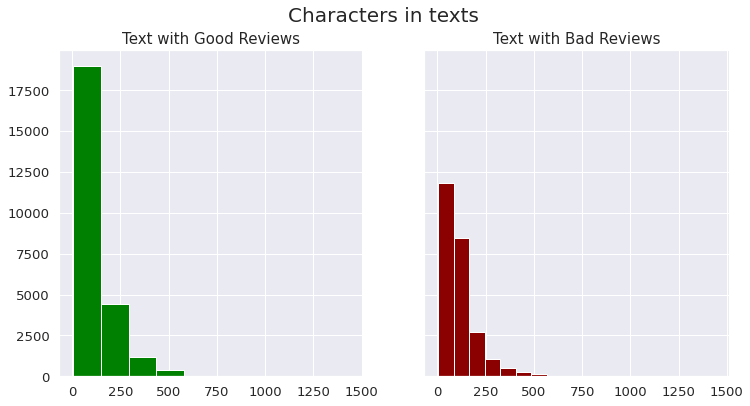

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,6), sharey=True, sharex=True)


text_len=df[df['sentiment']==1]['review_lemmatized'].str.len()
ax1.hist(text_len, color="green")
ax1.set_title('Text with Good Reviews', fontsize=15)


text_len=df[df['sentiment']==0]['review_lemmatized'].str.len()
ax2.hist(text_len,color='darkred')
ax2.set_title('Text with Bad Reviews', fontsize=15)

fig.suptitle('Characters in texts', fontsize=20)
plt.show()

Text(0.5, 0.98, 'Average word length in each text')

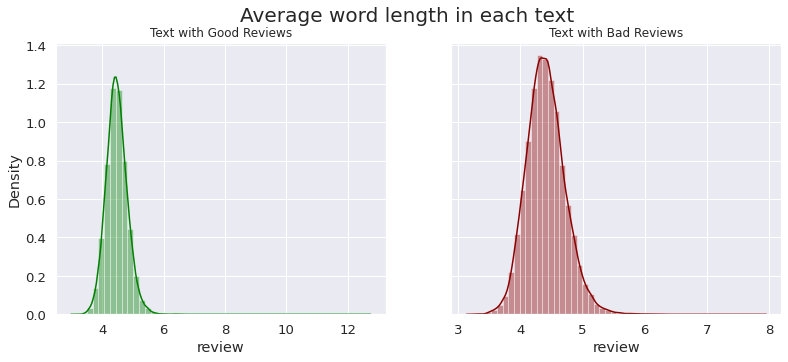

In [ ]:
# Average word length in a text

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(13,5), sharey=True)

word=df[df['sentiment']==1]['review'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='green')
ax1.set_title('Text with Good Reviews',fontsize=12)

word=df[df['sentiment']==0]['review'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='darkred')
ax2.set_title('Text with Bad Reviews',fontsize=12)
fig.suptitle('Average word length in each text', fontsize=20)

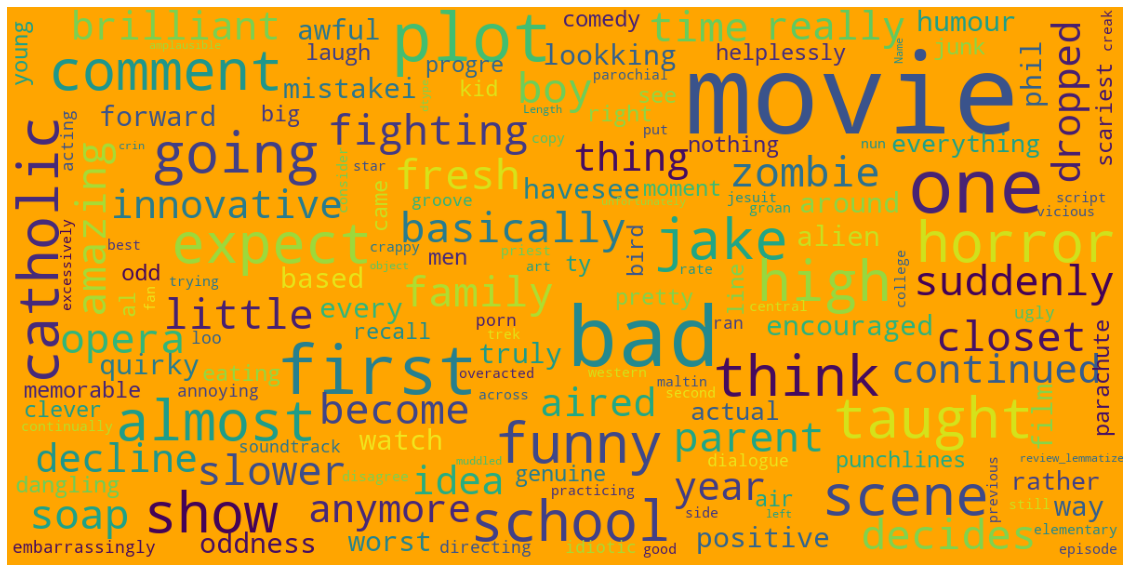

In [ ]:
from wordcloud import WordCloud,STOPWORDS

stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='orange',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1
).generate(str(data))

    fig = plt.figure(1, figsize=(20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title="Negative Sentiment Reviews", fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df[df["sentiment"]==0]["review_lemmatized"])

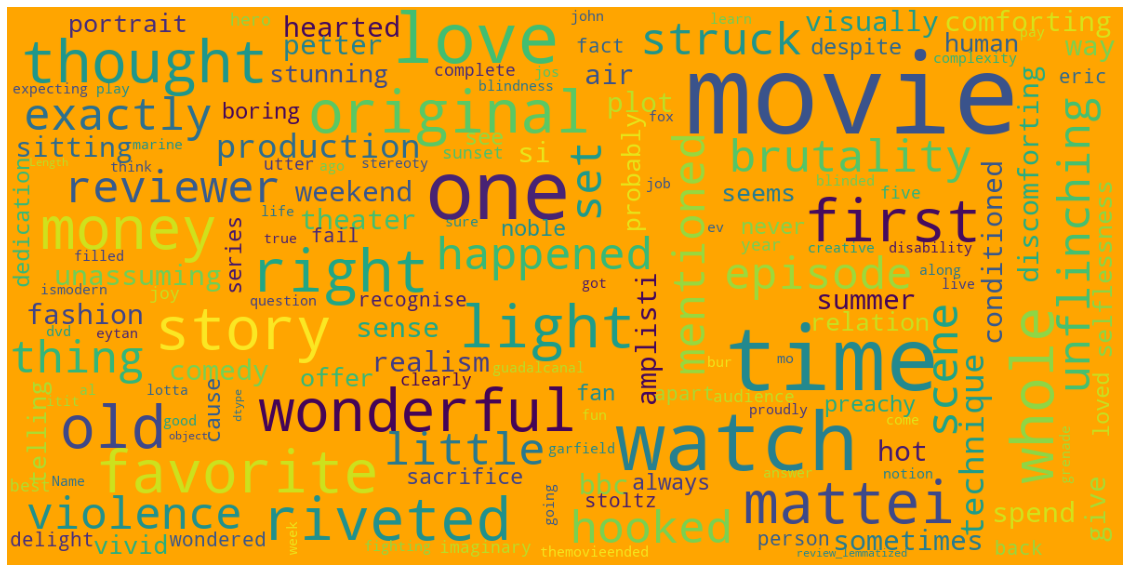

In [ ]:
from wordcloud import WordCloud,STOPWORDS

stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='orange',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1
).generate(str(data))

    fig = plt.figure(1, figsize=(20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df[df["sentiment"]==1]["review_lemmatized"])

#### We should untokenize the "review_lemmatized" column to find how much there are the most common words

In [ ]:
df['review_detoken']=df['review_lemmatized'].str.join(" ")

df.head(3)

,review,sentiment,review_tokenized,review_nostop,review_lemmatized,review_detoken
0,one of the other reviewers has mentioned that after watch just episode you will be hooked they are right as this is exactly what happened with me...,1,"[one, of, the, other, reviewers, has, mentioned, that, after, watch, just, episode, you, will, be, hooked, they, are, right, as, this, is, exactly...","[one, reviewers, mentioned, watch, episode, hooked, right, exactly, happened, first, thing, struck, brutality, unflinching, scenes, violence, set,...","[one, reviewer, mentioned, watch, episode, hooked, right, exactly, happened, first, thing, struck, brutality, unflinching, scene, violence, set, r...",one reviewer mentioned watch episode hooked right exactly happened first thing struck brutality unflinching scene violence set right word go trust...
1,a wonderful little production the movie technique is very unassuming very old time bbc fashion and gives a comforting and sometimes discomforting ...,1,"[a, wonderful, little, production, the, movie, technique, is, very, unassuming, very, old, time, bbc, fashion, and, gives, a, comforting, and, som...","[wonderful, little, production, movie, technique, unassuming, old, time, bbc, fashion, gives, comforting, sometimes, discomforting, sense, realism...","[wonderful, little, production, movie, technique, unassuming, old, time, bbc, fashion, give, comforting, sometimes, discomforting, sense, realism,...",wonderful little production movie technique unassuming old time bbc fashion give comforting sometimes discomforting sense realism entire piece act...
2,i thought this was a wonderful way to spend time on a too hot summer weekend sitting in the air conditioned theater and watch a light hearted come...,1,"[i, thought, this, was, a, wonderful, way, to, spend, time, on, a, too, hot, summer, weekend, sitting, in, the, air, conditioned, theater, and, wa...","[thought, wonderful, way, spend, time, hot, summer, weekend, sitting, air, conditioned, theater, watch, light, hearted, comedy, plot, si, amplisti...","[thought, wonderful, way, spend, time, hot, summer, weekend, sitting, air, conditioned, theater, watch, light, hearted, comedy, plot, si, amplisti...",thought wonderful way spend time hot summer weekend sitting air conditioned theater watch light hearted comedy plot si amplistic dialogue witty ch...


In [ ]:
def get_corpus(text):
    words = []
    for i in text:
        for j in i.split():
            words.append(j.strip())
    return words
corpus = get_corpus(df["review_detoken"])
corpus[:10]

['one',
 'reviewer',
 'mentioned',
 'watch',
 'episode',
 'hooked',
 'right',
 'exactly',
 'happened',
 'first']

In [ ]:
from collections import Counter

counter = Counter(corpus)
most_common = counter.most_common(25)
most_common = dict(most_common)
most_common

{'also': 17337,
 'bad': 17498,
 'character': 27893,
 'could': 18301,
 'even': 24399,
 'film': 25671,
 'get': 24384,
 'go': 18440,
 'good': 44454,
 'great': 17408,
 'hi': 21899,
 'like': 38021,
 'make': 23253,
 'movie': 96470,
 'much': 19008,
 'one': 53388,
 'people': 18155,
 'really': 22640,
 'scene': 21002,
 'see': 41173,
 'story': 24590,
 'time': 30231,
 'watch': 26692,
 'way': 16842,
 'would': 30511}

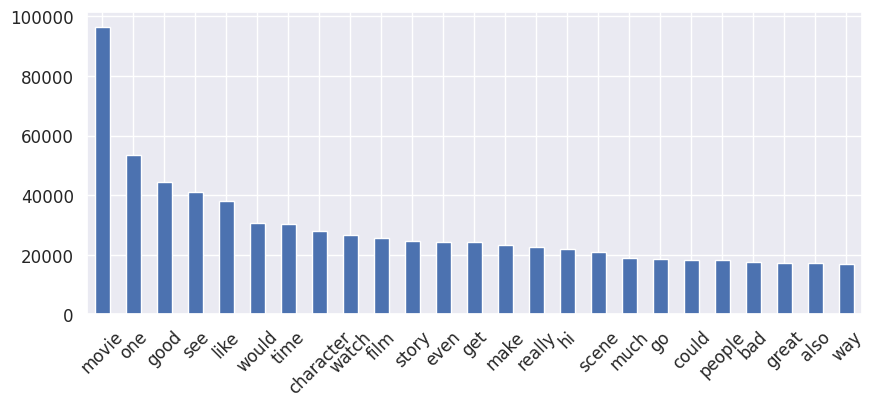

In [ ]:
most_common=pd.Series(data=most_common)

plt.figure(figsize=(10,4), dpi=100)
sns.set(style = "darkgrid" , font_scale = 1.1)
most_common.plot(kind='bar')
plt.xticks(rotation=45);

## Vectorizing

#### Bag of Words

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression

In [ ]:
X=df["review_detoken"]
Y=df["sentiment"]

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.20, random_state=42)

print(X_train.shape)
print(X_test.shape)

(40000,)
(10000,)


In [ ]:
# It is used to convert text documents to numerical vectors or bag of words

cv = CountVectorizer(ngram_range=(1,2))

In [ ]:
X_train_countvect = cv.fit_transform(X_train)

## Logistic Regression for NLP with CountVectorizer

In [ ]:
log_reg=LogisticRegression()

log_reg.fit(X_train_countvect, Y_train)

y_test_pred_log= log_reg.predict(cv.transform(X_test))

print("Accuracy score :", accuracy_score(Y_test, y_test_pred_log))

Accuracy score : 0.8999


In [ ]:
print("Classification report:","\n", classification_report(Y_test, y_test_pred_log),"\n")
print("Confusion matrix:","\n", confusion_matrix(Y_test, y_test_pred_log))

Classification report: 
               precision    recall  f1-score   support

           0       0.91      0.89      0.90      4961
           1       0.89      0.91      0.90      5039

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000
 

Confusion matrix: 
 [[4423  538]
 [ 463 4576]]


## Logistic Regression for NLP with TfidfVectorizer

In [ ]:
tfidf=TfidfVectorizer(ngram_range=(1,3))

X_train_tfidf = tfidf.fit_transform(X_train)

# X_train--> fit_transform() edilirken; X_test--> sadece transform() edilir

In [ ]:
log_reg_tfidf=LogisticRegression()

log_reg_tfidf.fit(X_train_tfidf, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_test_pred_tfidf = log_reg_tfidf.predict(tfidf.transform(X_test))

In [ ]:
print("Accuracy score :", accuracy_score(Y_test, y_test_pred_log))
print("Classification report:","\n", classification_report(Y_test, y_test_pred_log),"\n")
print("Confusion matrix:","\n", confusion_matrix(Y_test, y_test_pred_log))


Accuracy score : 0.8999
Classification report: 
               precision    recall  f1-score   support

           0       0.91      0.89      0.90      4961
           1       0.89      0.91      0.90      5039

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000
 

Confusion matrix: 
 [[4423  538]
 [ 463 4576]]


#### Both countvectorizer and tfidfvectorizer have same accuracy 

## XGBOOST

In [ ]:
from xgboost import XGBClassifier

xgboost=XGBClassifier(max_depth=10,
                      learning_rate=0.1,
                      n_estimators=60,
                      objective='binary:logistic',
                      n_jobs=1,
                      booster='gbtree')

xgboost.fit(X_train_tfidf,Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=20,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [39]:
y_test_pred_xgboost = xgboost.predict(tfidf.transform(X_test))

In [40]:
print("Accuracy score of xgboost:", accuracy_score(Y_test, y_test_pred_xgboost))
print("Classification report of xgboost:","\n", classification_report(Y_test, y_test_pred_xgboost),"\n")
print("Confusion matrix of xgboost:","\n", confusion_matrix(Y_test, y_test_pred_xgboost))

Accuracy score of xgboost: 0.8494
Classification report of xgboost: 
               precision    recall  f1-score   support

           0       0.86      0.83      0.85      4961
           1       0.84      0.86      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000
 

Confusion matrix of xgboost: 
 [[4138  823]
 [ 683 4356]]


## Random Forest

In [74]:
from sklearn.ensemble import RandomForestClassifier

forest=RandomForestClassifier(max_depth=20,
                              random_state=42,
                            n_estimators=50)

forest.fit(X_train_tfidf,Y_train)

y_test_pred_forest=forest.predict(tfidf.transform(X_test))

In [76]:
print("Accuracy score of random forest:", accuracy_score(Y_test, y_test_pred_forest))
print("Classification report of random forest:","\n", classification_report(Y_test, y_test_pred_forest),"\n")
print("Confusion matrix of random forest:","\n", confusion_matrix(Y_test, y_test_pred_forest))

Accuracy score of random forest: 0.8097
Classification report of random forest: 
               precision    recall  f1-score   support

           0       0.81      0.80      0.81      4961
           1       0.81      0.82      0.81      5039

    accuracy                           0.81     10000
   macro avg       0.81      0.81      0.81     10000
weighted avg       0.81      0.81      0.81     10000
 

Confusion matrix of random forest: 
 [[3990  971]
 [ 932 4107]]


# Let's continue to apply Deep Learning

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

In [46]:
X=df["review_detoken"].to_numpy()
Y=df["sentiment"].to_numpy()

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.20, random_state=42)

In [47]:
tfidf=TfidfVectorizer(ngram_range=(1,2))

X_train_tfidf = tfidf.fit_transform(X_train)

In [48]:
X_test_tfidf = tfidf.transform(X_test)

print(X_train_tfidf.shape)
print(X_test_tfidf.shape)
print(Y_train.shape)
print(Y_test.shape)

(40000, 2696099)
(10000, 2696099)
(40000,)
(10000,)


In [49]:
model=Sequential()

In [50]:
input=X_train_tfidf.shape[1]

print(input)

2696099


In [51]:
model.add(Dense(8, activation="relu", input_shape=(input,), name="Layer_1"))

In [52]:
model.add(Dense(4, activation="relu", name="Layer_2"))

In [53]:
model.add(Dense(1,activation="sigmoid", name="output_layer"))

In [54]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Layer_1 (Dense)              (None, 8)                 21568800  
_________________________________________________________________
Layer_2 (Dense)              (None, 4)                 36        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 5         
Total params: 21,568,841
Trainable params: 21,568,841
Non-trainable params: 0
_________________________________________________________________


In [55]:
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])

In [56]:
from scipy.sparse import csr_matrix

# we need to sort values by using scipy.sparse library

csr_matrix.sort_indices(X_train_tfidf)
csr_matrix.sort_indices(X_test_tfidf)

In [57]:
model.fit(X_train_tfidf, Y_train,
          epochs=10,
          batch_size = 10,
          validation_data=(X_test_tfidf, Y_test))

Epoch 1/10
4000/4000 [==============================] - 297s 74ms/step - loss: 0.3699 - accuracy: 0.8616 - val_loss: 0.2491 - val_accuracy: 0.9102
Epoch 2/10
4000/4000 [==============================] - 294s 73ms/step - loss: 0.0697 - accuracy: 0.9864 - val_loss: 0.2429 - val_accuracy: 0.9096
Epoch 3/10
4000/4000 [==============================] - 289s 72ms/step - loss: 0.0305 - accuracy: 0.9947 - val_loss: 0.3136 - val_accuracy: 0.8875
Epoch 4/10
4000/4000 [==============================] - 290s 73ms/step - loss: 0.0179 - accuracy: 0.9971 - val_loss: 0.3575 - val_accuracy: 0.8866
Epoch 5/10
4000/4000 [==============================] - 285s 71ms/step - loss: 0.0145 - accuracy: 0.9977 - val_loss: 0.5461 - val_accuracy: 0.8406
Epoch 6/10
4000/4000 [==============================] - 288s 72ms/step - loss: 0.0137 - accuracy: 0.9979 - val_loss: 0.4081 - val_accuracy: 0.8756
Epoch 7/10
4000/4000 [==============================] - 287s 72ms/step - loss: 0.0135 - accuracy: 0.9979 - val_loss: 0

In [59]:
# Making predictions

prediction=model.predict_classes(X_test_tfidf)
prediction_train=model.predict_classes(X_train_tfidf)

print("The accuracy of the test model:", accuracy_score(Y_test, prediction))
print("The accuracy of the train model:", accuracy_score(Y_train, prediction_train),"\n")
print("Classification report:","\n", classification_report(Y_test,prediction),"\n")
print("Confusion matrix:","\n", confusion_matrix(Y_test,prediction))

The accuracy of the test model: 0.8886
The accuracy of the train model: 0.997925 

Classification report: 
               precision    recall  f1-score   support

           0       0.95      0.82      0.88      4961
           1       0.84      0.96      0.90      5039

    accuracy                           0.89     10000
   macro avg       0.90      0.89      0.89     10000
weighted avg       0.90      0.89      0.89     10000
 

Confusion matrix: 
 [[4058  903]
 [ 211 4828]]


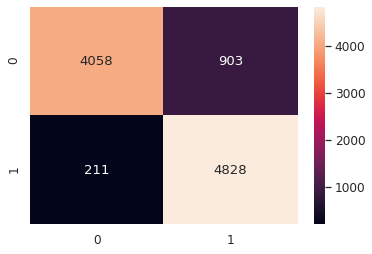

In [60]:
plt.figure(figsize=(6,4))

sns.heatmap(confusion_matrix(Y_test,prediction), annot=True, fmt='d');

In [79]:
log= accuracy_score(Y_test, y_test_pred_log)
xgboost= accuracy_score(Y_test, y_test_pred_xgboost)
forest= accuracy_score(Y_test, y_test_pred_forest)
deep=accuracy_score(Y_test, prediction)

df_log=pd.DataFrame(columns=["log"], data=[log])
df_xgboost=pd.DataFrame(columns=["xgboost"], data=[xgboost])
df_forest=pd.DataFrame(columns=["RForest"], data=[forest])
df_deep=pd.DataFrame(columns=["DeepLearning"], data=[deep])

df_model=pd.concat([df_log, df_xgboost, df_forest, df_deep], axis=1)
df_model

,log,xgboost,RForest,DeepLearning
0,0.8999,0.8494,0.8097,0.8886


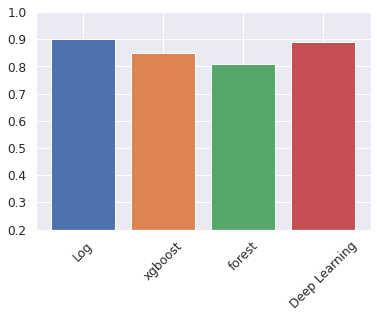

In [88]:
plt.bar("Log", height=pd.Series(data=log))
plt.bar("xgboost", height=pd.Series(data=xgboost))
plt.bar("forest", height=pd.Series(data=forest))
plt.bar("Deep Learning", height=pd.Series(data=deep))
plt.xticks(rotation=45)
plt.ylim(0.20,1);